In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
data = "../data/customer_churn_dataset.csv"

## Información de los datos

In [18]:
df = pd.read_csv(data)
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


- **CustomerID:** Código de identificación del cliente
- **Age:** Edad del cliente (en años)
- **Gender:** Género del cliente (Masculino/Femenino)
- **Tenure:** El período de tiempo que el cliente utiliza el servicio (en meses)
- **Usage Frequency:** La frecuencia con la que el cliente utiliza el servicio (en meses)
- **Support Calls:** Frecuencia de llamadas del cliente al servicio de atención
- **Payment Delay:** El período de retraso en el pago de las facturas del servicio por parte de los clientes (en meses)
- **Subscription Type:** El tipo de servicio seleccionado por el cliente (Básico/Estándar/Premium)
- **Contract Length:** El período de contrato del servicio seleccionado por el cliente (Mensual/Trimestral/Anual)
- **Total Spend:** Dinero total gastado por el cliente en el servicio (en USD)
- **Last Interaction:** El período de tiempo desde el último uso del cliente hasta el presente (en meses)
- **Churn:** El estado actual del cliente, continúa con el servicio (0) o lo abandona (1)

## Preprocesamiento de datos

In [19]:
# Permite conocer las dimensiones del DataFrame
df.shape

(64374, 12)

In [20]:
# Para ver la información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [21]:
# Verificar si hay duplicados
df.duplicated().sum()

np.int64(0)

In [22]:
# Verificar si hay datos faltantes
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [23]:
# CustomerID es solo un identificador, no aporta información predictiva
df = df.drop('CustomerID', axis=1)

In [25]:
# Lista de las columnas
df.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Subscription Type',
 'Contract Length',
 'Total Spend',
 'Last Interaction',
 'Churn']

In [24]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [30]:
# Imprimiendo los valores únicos en todas las columnas menos las numericas.

caracteristicas_numericas = ['Age',
 'Tenure',
 'Usage Frequency',
 'Support Calls',
 'Payment Delay',
 'Total Spend',
 'Last Interaction', 
 'Churn']

for col in df.columns:
    if col not in caracteristicas_numericas:
        print(col, df[col].unique())
        print("-" * 70)

Gender ['Female' 'Male']
----------------------------------------------------------------------
Subscription Type ['Basic' 'Standard' 'Premium']
----------------------------------------------------------------------
Contract Length ['Monthly' 'Annual' 'Quarterly']
----------------------------------------------------------------------


## EDA (Análisis Exploratorio de Datos)

In [31]:

# Informacion de los datos numericos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64374.0,41.970982,13.924911,18.0,30.0,42.0,54.0,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.0,33.0,47.0,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.0,15.0,23.0,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.0,6.0,8.0,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.0,19.0,25.0,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.0,534.0,768.0,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.0,15.0,23.0,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.0,0.0,1.0,1.0


/tmp/ipykernel_1977/2423238704.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Churn',data=df, palette='magma')
/tmp/ipykernel_1977/2423238704.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se queda', 'Se va'])


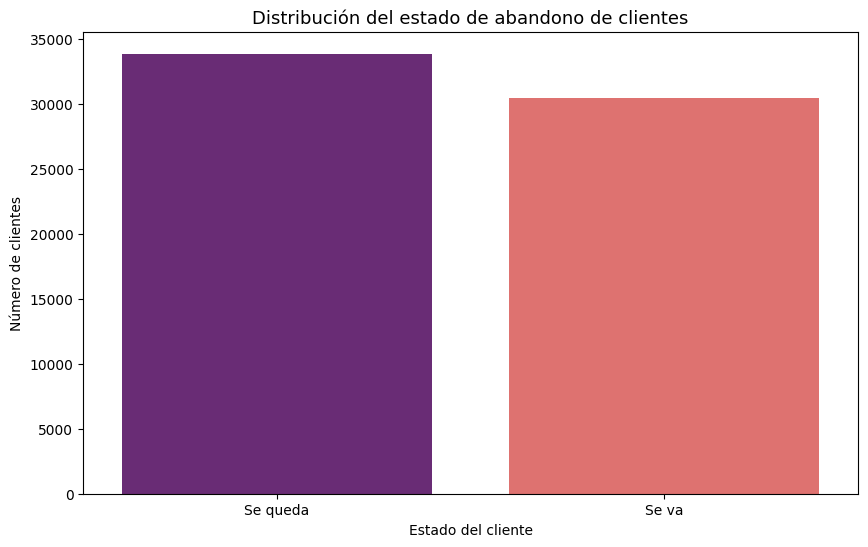

Distribución porcentual de Churn:
Churn
Se queda    52.631497
Se va       47.368503
Name: proportion, dtype: float64


In [40]:
# Información del estado actual del cliente
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Churn',data=df, palette='magma')

ax.set_title('Distribución del estado de abandono de clientes', fontsize=13)
ax.set_xlabel('Estado del cliente')
ax.set_ylabel('Número de clientes')

ax.set_xticklabels(['Se queda', 'Se va'])

plt.show()

churn_pct = df['Churn'].value_counts(normalize=True) * 100
print('Distribución porcentual de Churn:')
print(churn_pct.rename({0: 'Se queda', 1: 'Se va'}))


El resultado muestra que tenemos un 52.6% de clientes que permanecen y un 47.4% que se van.

/tmp/ipykernel_1977/4291701491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn', y='Age', palette='viridis')
/tmp/ipykernel_1977/4291701491.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se quedan', 'Se van'])


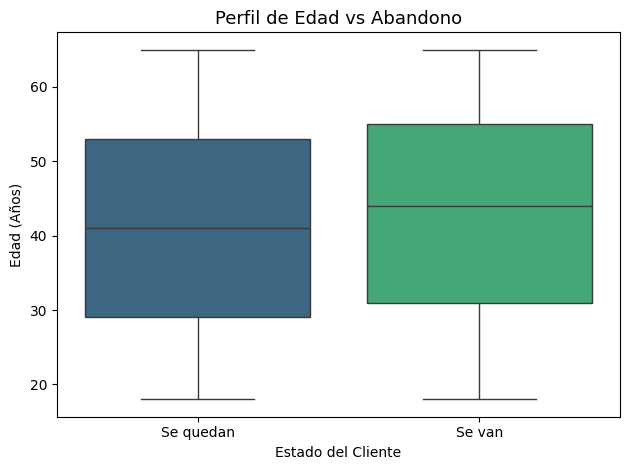

In [47]:
# Información del estado actual del clienteplt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='Churn', y='Age', palette='viridis')

ax.set_title('Perfil de Edad vs Abandono', fontsize=13)
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Edad (Años)')
ax.set_xticklabels(['Se quedan', 'Se van'])

plt.tight_layout()
plt.show()

El análisis muestra que los clientes que abandonan el servicio presentan una mediana de edad ligeramente superior a la de los clientes retenidos. Sin embargo, existe un alto solapamiento entre ambos grupos, lo que sugiere que la edad, aunque relevante, no es un factor determinante único del abandono.

/tmp/ipykernel_1977/3419563793.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='Churn', y='Support Calls', palette='magma')
/tmp/ipykernel_1977/3419563793.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Se quedan', 'Se van'])


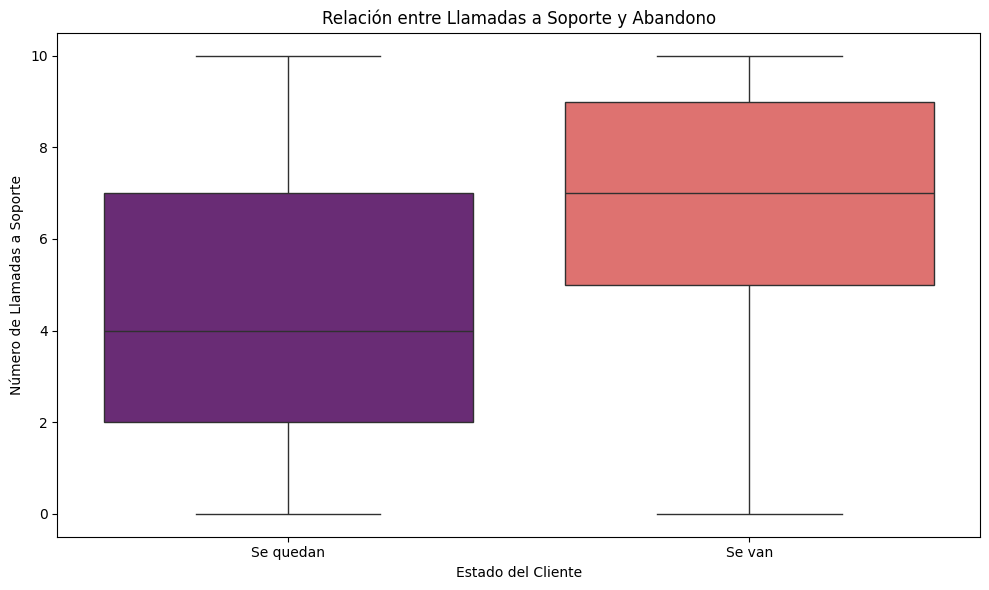

In [ ]:
# Número de llamadas a soporte según el estado del cliente
plt.figure(figsize=(10, 6))

ax = sns.boxplot(data=df, x='Churn', y='Support Calls', palette='magma')
plt.title('Relación entre Llamadas a Soporte y Abandono')
ax.set_xlabel('Estado del Cliente')
ax.set_ylabel('Número de Llamadas a Soporte')
ax.set_xticklabels(['Se quedan', 'Se van'])

plt.tight_layout()
plt.show()

Los clientes que abandonan el servicio presentan un número significativamente mayor de llamadas a soporte en comparación con los clientes retenidos. Esto sugiere que una mayor interacción con el área de soporte, posiblemente debido a problemas recurrentes o insatisfacción, está asociada con una mayor probabilidad de abandono.

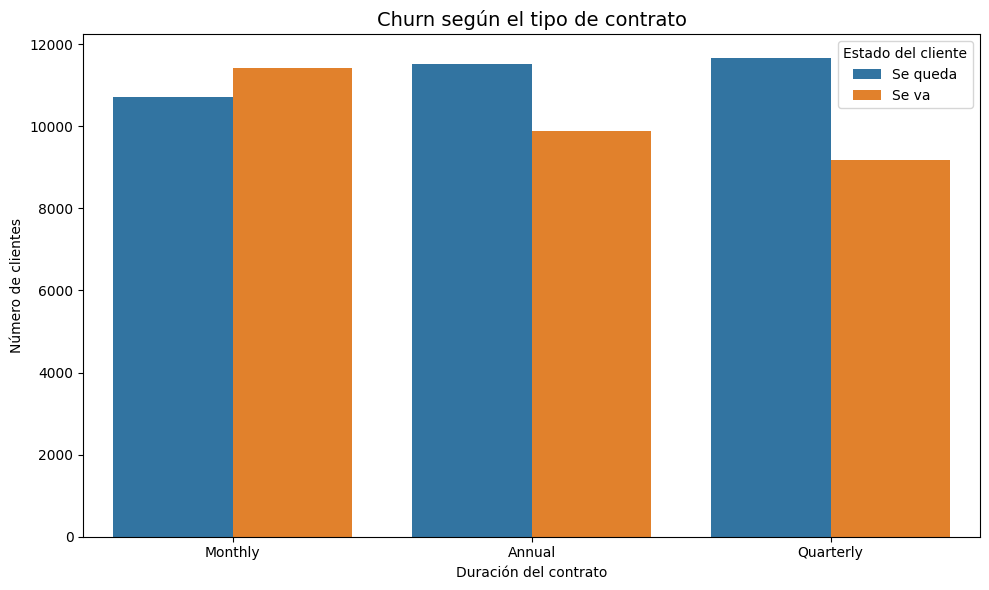

In [51]:
# Tipos de contratos y permanencia
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='Contract Length',hue='Churn',data=df)

ax.set_title('Churn según el tipo de contrato', fontsize=14)
ax.set_xlabel('Duración del contrato')
ax.set_ylabel('Número de clientes')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles,['Se queda', 'Se va'],title='Estado del cliente')

plt.tight_layout()
plt.show()

Como se observa en la gráfica, los contratos Mensuales (Monthly) tienen una proporción de fuga mucho mayor que los Anuales o Trimestrales. De hecho, en el contrato mensual, hay más personas que se van a las que permanecen